<a href="https://colab.research.google.com/github/mmdreza-ghorbani/Thesis_codes/blob/main/imputing%20null%20data%20using%20machine%20learning%20in%20time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install datawig

#import os
#os.kill(os.getpid(), 9)





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:

import pandas as pd
#url = 'https://docs.google.com/spreadsheets/d/1lpuG4rGmb-erP_-JqYMgogRdL8eH4xQi/edit?usp=sharing&ouid=114255579325312313141&rtpof=true&sd=true'
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/My Drive/AIRNOW/pm10.xlsx'
newIndex = pd.read_excel(url)
newIndex.drop(newIndex[['mantaghe12','mantaghe10','mantaghe11','sadr','mantaghe4','parkRoz']], axis=1, inplace=True)
newIndex['Datetime'] = pd.DatetimeIndex(newIndex['Datetime'])
newIndex.set_index('Datetime',inplace = True)
newIndex = newIndex.sort_index()
#newIndex = newIndex['2017-01-01 00:00:00':'2021-01-01 00:00:00']
newIndex.astype(float)
dfnotna = newIndex[newIndex['mantaghe22'].notna()]
dfisna = newIndex[newIndex['mantaghe22'].isna()]
listOfCulomns = newIndex.columns.to_list()
listOfCulomns.remove('mantaghe22')
import datawig
dfnotna = dfnotna.sort_index()
#df_train, df_test = datawig.utils.random_split(dfnotna)
df_test = dfnotna['2019-01-01 00:00:00':'2020-01-01 00:00:00']
a = dfnotna['2017-01-01 00:00:00':'2019-01-01 00:00:00']
b = dfnotna['2020-01-01 00:00:00':'2021-01-01 00:00:00']
dfnotna.reset_index(inplace=True)
a.reset_index(inplace=True)
b.reset_index(inplace=True)
df_train = pd.merge(a,b, how='outer',on=dfnotna.columns.to_list() )
df_train['Datetime'] = pd.DatetimeIndex(df_train['Datetime'])
df_train.set_index('Datetime',inplace = True)
df_train = df_train.sort_index()
dfnotna['Datetime'] = pd.DatetimeIndex(dfnotna['Datetime'])
dfnotna.set_index('Datetime',inplace = True)
dfnotna = dfnotna.sort_index()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ModuleNotFoundError: ignored

In [ ]:
##################################   for alll
import datawig
from google.colab import files
newURL='/content/drive/My Drive/AIRNOW/'
for item in newIndex.columns.to_list():
  dfnotna = newIndex[newIndex[item].notna()]
  dfisna = newIndex[newIndex[item].isna()]
  listOfCulomns = newIndex.columns.to_list()
  listOfCulomns.remove(item)
  print(item)
  dfnotna = dfnotna.sort_index()
  df_train, df_test = datawig.utils.random_split(dfnotna)
  imputer = datawig.SimpleImputer(input_columns=listOfCulomns, output_column=item , output_path = 'imputer_model')
  imputer.fit_hpo(train_df=df_train,num_epochs=11000,test_df=df_test,patience=3)
  predictions = imputer.predict(df_test)
  predictions_train = imputer.predict(df_train)
  predictionisna =  imputer.predict(dfisna)
  predictions[[item,item+'_imputed']].to_excel(newURL+'pm10_predictions_'+item+'.xlsx')
  predictionisna[[item,item+'_imputed']].to_excel(newURL+'pm10_predictionisna_'+item+'.xlsx')
  predictions_train[[item,item+'_imputed']].to_excel(newURL+'pm10_predictions_train_'+item+'.xlsx')







In [ ]:
import datawig
dfnotna = dfnotna.sort_index()
df_train, df_test = datawig.utils.random_split(dfnotna)
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
input_columns=listOfCulomns, # column(s) containing information about the column we want to impute
 #   input_columns=['mahalati'], # column(s) containing information about the column we want to impute
output_column= 'mantaghe22', # the column we'd like to impute values for
    output_path = 'imputer_model', # stores model data and metrics
   numeric_hidden_layers=10)
# impute missing values
#predictions = datawig.SimpleImputer.complete(newIndex,precision_threshold=0.5,num_epochs=11000,hpo = True)
#ss = datawig.simple_imputer.complete(newIndex,precision_threshold=0.5,num_epochs=11000)
#Fit an imputer model on the train data
#imputer.fit(train_df=df_train, num_epochs=11000)
imputer.fit_hpo(train_df=df_train,num_epochs=11000,test_df=df_test,patience=3,learning_rate_candidates =[.1,.01,.001])
#
#print(imputer.is_fitted())
#Impute missing values and return original dataframe with predictions
#imputed = imputer.predict_above_precision(df_test)
#x = imputer.transform(imputed)
# Impute missing values and return original dataframe with predictions
predictions = imputer.predict(df_test)
predictions_train = imputer.predict(df_train)
predictionisna =  imputer.predict(dfisna)
#predictionisna =  imputer.predict(dfisna*1000)
#newIndex = newIndex.set_index('unique_col')
#newIndex.fillna(predictions.set_index('Datetime'))
#Calculate f1 score
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import f1_score
#f1 = f1_score(predictions['finish'], predictions['finish_imputed'])
#f2 = mean_squared_error(predictions['finish'], predictions['finish_imputed'])
#print(f1)
#print(f2)
#Print overall classification report
#print(classification_report(predictions['finish'], predictions['finish_imputed']))


#print(classification_report(predictions['mantaghe22'], predictions['mantaghe22_imputed']))
#predictionisna.to_excel('pm10_imputedisna.xlsx')
#prediction.to_excel('pm10_imputed.xlsx')

#from google.colab import files
#files.download('pm10_imputedisna.xlsx')
#files.download('pm10_imputed.xlsx')

KeyboardInterrupt: ignored

In [ ]:
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
input_columns=listOfCulomns, # column(s) containing information about the column we want to impute
 #   input_columns=['mahalati'], # column(s) containing information about the column we want to impute
output_column= 'mantaghe22', # the column we'd like to impute values for
    output_path = 'imputer_model', # stores model data and metrics
   numeric_hidden_layers=10)
# impute missing values
#predictions = datawig.SimpleImputer.complete(newIndex,precision_threshold=0.5,num_epochs=11000,hpo = True)
#ss = datawig.simple_imputer.complete(newIndex,precision_threshold=0.5,num_epochs=11000)
#Fit an imputer model on the train data
#imputer.fit(train_df=df_train, num_epochs=11000)
imputer.fit(train_df=df_train,num_epochs=11000,test_df=df_test,patience=12,learning_rate =.0001)
predictions = imputer.predict(df_test)
predictions_train = imputer.predict(df_train)
predictionisna =  imputer.predict(dfisna)

INFO:root:
========== start: fit model
2022-08-18 22:53:14,642 [INFO]  
========== start: fit model
2022-08-18 22:53:14,653 [WARNING]  Already bound, ignoring bind()
INFO:root:Epoch[0] Batch [0-347]	Speed: 3390.54 samples/sec	cross-entropy=16.554090	mantaghe22-accuracy=0.000000
2022-08-18 22:53:16,354 [INFO]  Epoch[0] Batch [0-347]	Speed: 3390.54 samples/sec	cross-entropy=16.554090	mantaghe22-accuracy=0.000000
INFO:root:Epoch[0] Train-cross-entropy=15.749846
2022-08-18 22:53:18,003 [INFO]  Epoch[0] Train-cross-entropy=15.749846
INFO:root:Epoch[0] Train-mantaghe22-accuracy=0.000000
2022-08-18 22:53:18,121 [INFO]  Epoch[0] Train-mantaghe22-accuracy=0.000000
INFO:root:Epoch[0] Time cost=3.446
2022-08-18 22:53:18,130 [INFO]  Epoch[0] Time cost=3.446
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
2022-08-18 22:53:18,157 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=14.661528
2022-08-18 22:53:19,024 [INFO]  Epoch[0]

In [ ]:
predictions_train.reset_index(inplace=True)
predictions.reset_index(inplace=True)
df_all = pd.merge(predictions_train,predictions, how='outer',on=predictions_train.columns.to_list() )
df_all['Datetime'] = pd.DatetimeIndex(df_all['Datetime'])
df_all.set_index('Datetime',inplace = True)
df_all = df_all.sort_index()
predictions['Datetime'] = pd.DatetimeIndex(predictions['Datetime'])
predictions.set_index('Datetime',inplace = True)
predictions = predictions.sort_index()
predictions_train['Datetime'] = pd.DatetimeIndex(predictions_train['Datetime'])
predictions_train.set_index('Datetime',inplace = True)
predictions_train = predictions_train.sort_index()
#print(df_all.head())

In [ ]:

import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('MAE test:', mean_absolute_error(predictions['mantaghe22'], predictions['mantaghe22_imputed']))
print('R^2 test:', r2_score(predictions['mantaghe22'], predictions['mantaghe22_imputed']))
print('MSE test:', mean_squared_error(predictions['mantaghe22'], predictions['mantaghe22_imputed']))
print('RMSE test:', np.sqrt(mean_squared_error(predictions['mantaghe22'], predictions['mantaghe22_imputed'])))
print('\n')

print('MAE train:', mean_absolute_error(predictions_train['mantaghe22'], predictions_train['mantaghe22_imputed']))
print('R^2 train:', r2_score(predictions_train['mantaghe22'], predictions_train['mantaghe22_imputed']))
print('MSE train:', mean_squared_error(predictions_train['mantaghe22'], predictions_train['mantaghe22_imputed']))
print('RMSE train:', np.sqrt(mean_squared_error(predictions_train['mantaghe22'], predictions_train['mantaghe22_imputed'])))
print('\n')

print('MAE all:', mean_absolute_error(df_all['mantaghe22'], df_all['mantaghe22_imputed']))
print('R^2 all:', r2_score(df_all['mantaghe22'], df_all['mantaghe22_imputed']))
print('MSE all:', mean_squared_error(df_all['mantaghe22'], df_all['mantaghe22_imputed']))
print('RMSE all:', np.sqrt(mean_squared_error(df_all['mantaghe22'], df_all['mantaghe22_imputed'])))

MAE test: 12.40266731604569
R^2 test: 0.7033180616180178
MSE test: 310.6253160521895
RMSE test: 17.624565698257346


MAE train: 12.644554917792046
R^2 train: 0.6917714863487385
MSE train: 336.5470671088249
RMSE train: 18.345219189446194


MAE all: 12.536733632903823
R^2 all: 0.6980556834056856
MSE all: 324.91256553923074
RMSE all: 18.025331218572124


In [ ]:
import numpy as np
df_t = df_test
df_t['mantaghe22']= np.nan

In [ ]:
df_train = pd.merge(a,b, how='outer',on=a.columns.to_list() )
df_train['Datetime'] = pd.DatetimeIndex(df_train['Datetime'])
df_train.set_index('Datetime',inplace = True)
df_train = df_train.sort_index()

In [ ]:
df_t.drop(df_t.columns[[0]], axis=1, inplace=True)

In [ ]:
#df_t.reset_index(inplace=True)
#df_train.reset_index(inplace=True)
df_all_knn = pd.merge(df_t,df_train, how='outer',on=df_t.columns.to_list() )
df_all_knn['Datetime'] = pd.DatetimeIndex(df_all_knn['Datetime'])
df_all_knn.set_index('Datetime',inplace = True)
df_all_knn = df_all_knn.sort_index()
df_train['Datetime'] = pd.DatetimeIndex(df_train['Datetime'])
df_train.set_index('Datetime',inplace = True)
df_train = df_train.sort_index()

In [ ]:
from sklearn.impute import KNNImputer # Import KNNImputer class
import numpy as np
# Use KNN algorithm
imputer2 = KNNImputer()


# Fit models
imputer2.fit(np.array(newIndex))


# Relocate Null values
dataShahrdari2Trans = imputer2.transform(np.array(newIndex))


print(dataShahrdari2Trans)

[[182.   87.  157.  ... 217.   96.8 183. ]
 [176.   77.  153.  ... 167.  113.2 187. ]
 [200.   79.  120.  ... 146.  137.  184. ]
 ...
 [143.  125.  112.  ... 101.   85.  133. ]
 [133.  128.4 111.  ...  93.   89.2 137. ]
 [130.   95.2 108.  ...  91.   80.2 119. ]]


In [ ]:
newtrain = pd.DataFrame(data=dataShahrdari2Trans[0:,0:],    # values
...              #index=[i for i in range(dataShahrdari2Trans.shape[0]-1)],    # 1st column as index
...              columns=df_all_knn.columns.to_list())  # 1st row as the column names

In [ ]:
newtrain = pd.DataFrame(data=dataShahrdari2Trans[0:,0:],    # values
...              columns=newIndex.columns.to_list())  # 1st row as the column names
newIndex.reset_index(inplace=True)
newtrain['Datetime'] = newIndex['Datetime']
newtrain['Datetime'] = pd.DatetimeIndex(newtrain['Datetime'])
newtrain.set_index('Datetime',inplace = True)
newtrain = newtrain.sort_index()
newIndex['Datetime'] = pd.DatetimeIndex(newIndex['Datetime'])
newIndex.set_index('Datetime',inplace = True)
newIndex = newIndex.sort_index()
newtrain.to_excel('impute_using_knn.xlsx')
from google.colab import files
files.download('impute_using_knn.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
newURL='/content/drive/My Drive/AIRNOW/'
newtrain.to_excel(newURL+'impute_using_knn.xlsx')

In [ ]:
df_all_knn.reset_index(inplace=True)
newtrain['Datetime'] = df_all_knn['Datetime']
newtrain['Datetime'] = pd.DatetimeIndex(newtrain['Datetime'])
newtrain.set_index('Datetime',inplace = True)
newtrain = newtrain.sort_index()
df_all_knn['Datetime'] = pd.DatetimeIndex(df_all_knn['Datetime'])
df_all_knn.set_index('Datetime',inplace = True)
df_all_knn = df_all_knn.sort_index()

In [ ]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
"""
print('MAE test:', mean_absolute_error(dataShahrdari2Trans[:,df_train.columns.get_loc('masoudieh')], df_train['masoudieh']))
print('R^2 test:', r2_score(dataShahrdari2Trans[:,df_train.columns.get_loc('masoudieh')], df_train['masoudieh']))
print('MSE test:', mean_squared_error(dataShahrdari2Trans[:,df_train.columns.get_loc('masoudieh')], df_train['masoudieh']))
print('RMSE test:', np.sqrt(mean_squared_error(dataShahrdari2Trans[:,df_train.columns.get_loc('masoudieh')], df_train['masoudieh'])))
print('\n')
"""
#print('MAE train:', mean_absolute_error(predictions_train['mantaghe22'], predictions_train['mantaghe22_imputed']))
#print('R^2 train:', r2_score(predictions_train['mantaghe22'], predictions_train['mantaghe22_imputed']))
#print('MSE train:', mean_squared_error(predictions_train['mantaghe22'], predictions_train['mantaghe22_imputed']))
#('RMSE train:', np.sqrt(mean_squared_error(predictions_train['mantaghe22'], predictions_train['mantaghe22_imputed'])))
#print('\n')
gg = dfnotna['2017-01-01 00:00:00':'2021-01-01 00:00:00']
print('MAE all:', mean_absolute_error(gg['mantaghe22'], newtrain['mantaghe22']))
print('R^2 all:', r2_score(gg['mantaghe22'], newtrain['mantaghe22']))
print('MSE all:', mean_squared_error(gg['mantaghe22'], newtrain['mantaghe22']))
print('RMSE all:', np.sqrt(mean_squared_error(gg['mantaghe22'], newtrain['mantaghe22'])))

MAE all: 6.101597510373444
R^2 all: 0.8419812897649657
MSE all: 170.03885062240664
RMSE all: 13.039894578653872


Text(0.5, 1.0, 'Prediction on train data')

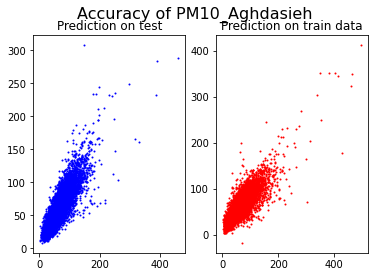

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(predictions['mantaghe22'],predictions['mantaghe22_imputed'])
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
    #fig.set_figheight(10)
    #fig.set_figwidth(15)
    #fig.supylabel('ug/m3', y=0.15, fontsize=14)
fig.suptitle("Accuracy of PM10_Aghdasieh", fontsize=16)
axes[0].scatter(predictions['mantaghe22'],predictions['mantaghe22_imputed'], s=1, c='b', marker="o", label='first')
axes[0].set_title("Prediction on test", loc='center', color='black' )
axes[1].scatter(predictions_train['mantaghe22'],predictions_train['mantaghe22_imputed'], s=1, c='r', marker="o", label='second')
axes[1].set_title("Prediction on train data", loc='center', color='black' )




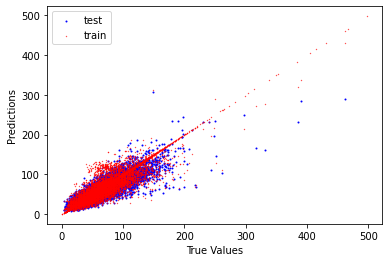

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(predictions['mantaghe22'],predictions['mantaghe22_imputed'], s=1, c='b', marker="o", label='test')
ax1.scatter(gg['mantaghe22'], newtrain['mantaghe22'], s=.1, c='r', marker="o", label='train')
plt.legend(loc='upper left');
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


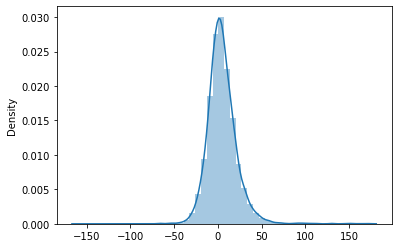

In [ ]:
import seaborn as sns
sns.histplot(predictions['mantaghe22']-predictions['mantaghe22_imputed'])

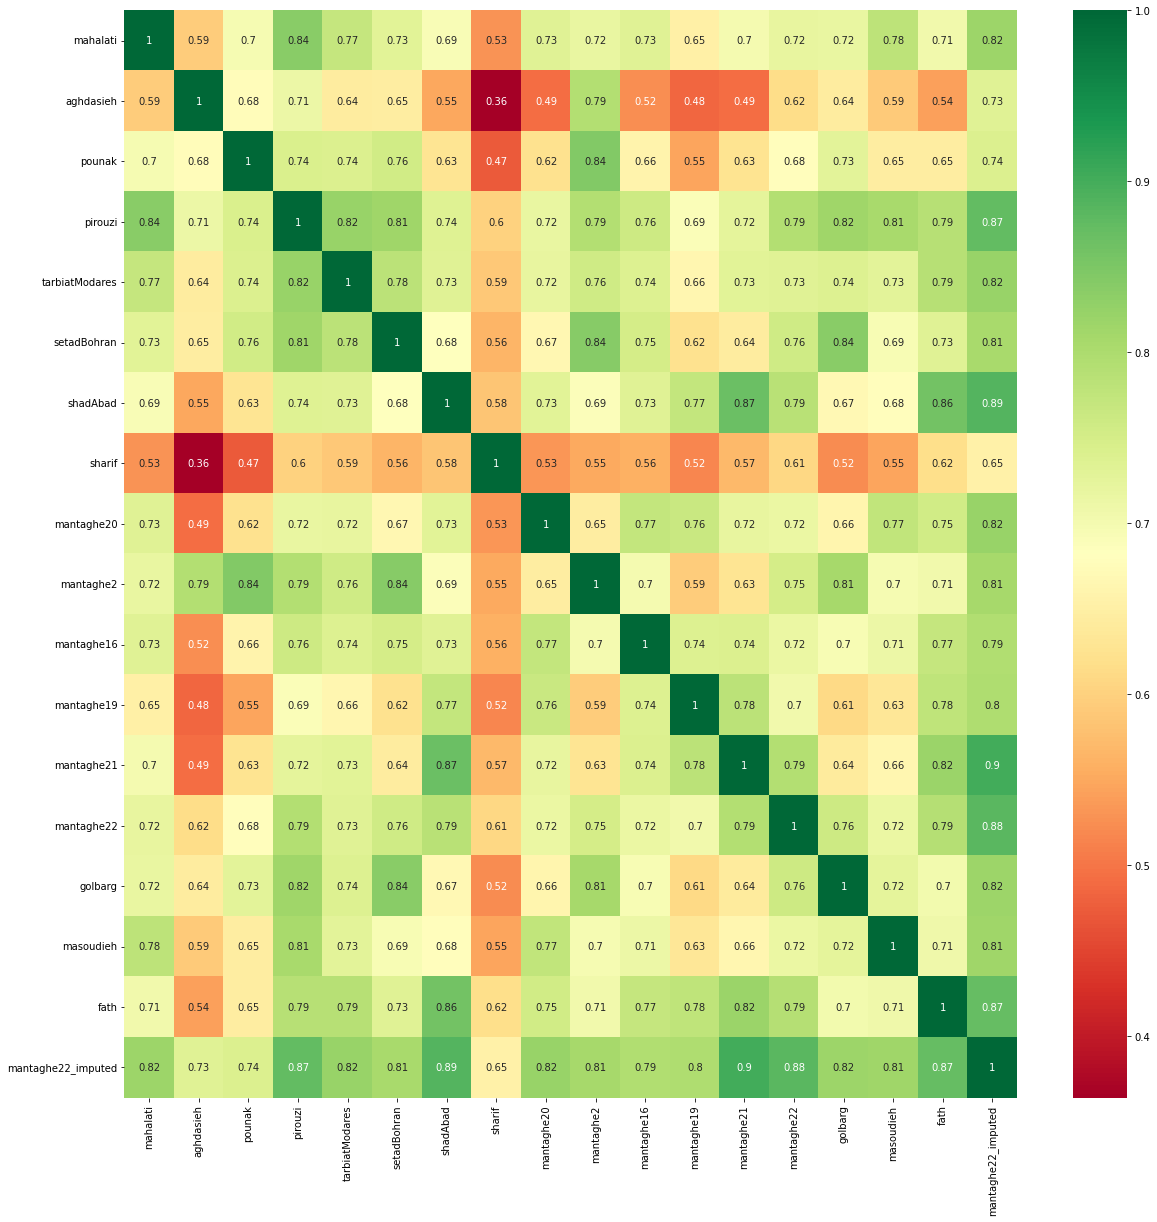

In [ ]:

#get correlations of each features in dataset
corrmat = df_all.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_all[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:

df_all.to_excel('pm10_notna.xlsx')
predictionisna.to_excel('pm10_imputedisna.xlsx')
from google.colab import files
files.download('pm10_imputedisna.xlsx')
files.download('pm10_notna.xlsx')


NameError: ignored

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))